# CITS5508 - Lab4

### Henry Liu ( 22672083 )

## Introduction

This lab4 consists of two small projects. In the first project, I train a Voting regressor for
a small regression problem; in the second project, I train (i) two Random Forest models using
the original data and using the reduced-dimensional data respectively; and (ii) a Bagging regressor. 

## Setup libraries and load data set

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(1212)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Project 1

### Take a quick look at the data structure

In [3]:
data_origin1 = pd.read_csv("slump_test.data")

In [4]:
data_origin1.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


**Because we have three output in origin data,Output variables (3):SLUMP (cm), FLOW (cm), 28-day Compressive Strength (Mpa) and we only need to use the last one -- Mpa, so I create the data only with one output Mpa and drop the festure 'No' below.**

In [5]:
def cleaning(data_origin,data_tune):
    data_tune = data_origin.drop("No", axis=1)
    data_tune = data_tune.drop("SLUMP(cm)", axis=1)
    data_tune = data_tune.drop("FLOW(cm)", axis=1)
    return data_tune


In [6]:
data_tune = data_origin1
data_tune = cleaning(data_origin1,data_tune)

In [7]:
"""
attributes = ['Cement','Slag','Fly ash','Water','SP','Coarse Aggr.','Fine Aggr.','Compressive Strength (28-day)(Mpa)']
"""
data_tune


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82
...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,49.17


In [8]:
data_tune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB


In [9]:
data_tune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB


In [10]:
#data_frame = data_origin[attributes]

In [11]:
#data_frame.head()

In [12]:
y = data_tune['Compressive Strength (28-day)(Mpa)']
y


0      34.99
1      41.14
2      41.81
3      42.08
4      26.82
       ...  
98     49.97
99     50.23
100    50.50
101    49.17
102    48.77
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

In [13]:
features = ['Cement','Slag','Fly ash','Water','SP','Coarse Aggr.','Fine Aggr.']
X = data_tune[features]
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0
...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8


In [14]:
# convert csv file to dict(key-value pairs each row)
def row_csv2dict(csv_file):
    dict_club={}
    with open(csv_file)as f:
        reader=csv.reader(f,delimiter=',')
        for row in reader:
            dict_club[row[0]]=row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[10]
    return dict_club

In [15]:
#data_list = row_csv2dict('slump_test.data')

In [16]:
#data_list

In [17]:
#del data_list['No']

In [18]:
#data_list

In [19]:
#data = data_frame.to_numpy()

**Split training set and test set**

In [20]:
from sklearn.model_selection import train_test_split


training_x_data1, testing_x_data1,training_y_data1, testing_y_data1 = train_test_split(X,y, test_size=0.2, random_state=1212)



In [21]:
X_train, X_test, y_train, y_test = training_x_data1.to_numpy(),testing_x_data1.to_numpy(),training_y_data1.to_numpy(),testing_y_data1.to_numpy()

**Create voting classifiers**

In [22]:
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

lin_reg = LinearRegression(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
SGD_reg = SGDRegressor(penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
svm_reg = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)



voting_reg = VotingRegressor(
    estimators=[('lc', lin_reg), ('SGD', SGD_reg), ('svm', svm_reg)])

In [23]:
voting_reg.fit(X_train.astype('float'),y_train.astype('float'))

VotingRegressor(estimators=[('lc', LinearRegression()), ('SGD', SGDRegressor()),
                            ('svm', SVR())])

In [24]:
X_train.astype('float')

array([[1.4300e+02, 1.3100e+02, 1.6800e+02, 2.1700e+02, 6.0000e+00,
        8.9100e+02, 6.7200e+02],
       [1.4800e+02, 1.0900e+02, 1.3900e+02, 1.9300e+02, 7.0000e+00,
        7.6800e+02, 9.0200e+02],
       [1.6000e+02, 1.4600e+02, 1.8800e+02, 2.0300e+02, 1.1000e+01,
        8.2900e+02, 7.1000e+02],
       [1.7200e+02, 1.6210e+02, 2.3850e+02, 1.6600e+02, 7.4000e+00,
        9.5330e+02, 6.4140e+02],
       [2.7800e+02, 0.0000e+00, 1.1700e+02, 2.0500e+02, 9.0000e+00,
        8.7500e+02, 7.9900e+02],
       [1.4330e+02, 9.1800e+01, 2.3980e+02, 2.0080e+02, 6.2000e+00,
        9.6480e+02, 6.4710e+02],
       [1.4600e+02, 1.0600e+02, 1.3700e+02, 2.0900e+02, 6.0000e+00,
        8.7500e+02, 7.6500e+02],
       [1.6200e+02, 1.4800e+02, 1.9100e+02, 1.7900e+02, 1.6000e+01,
        8.4000e+02, 7.4300e+02],
       [1.5900e+02, 1.9300e+02, 0.0000e+00, 2.0800e+02, 1.2000e+01,
        8.2100e+02, 8.1800e+02],
       [1.6530e+02, 1.4320e+02, 2.3830e+02, 2.0040e+02, 7.1000e+00,
        8.8320e+02, 6.5

In [25]:
training_x1_data1 = training_x_data1['SP']

In [26]:
X1_train = training_x1_data1.to_numpy()
X1_train

array([ 6. ,  7. , 11. ,  7.4,  9. ,  6.2,  6. , 16. , 12. ,  7.1,  7. ,
        8. ,  6. , 12. ,  6. ,  8.9, 11. ,  8.3,  5.7,  6. ,  6. , 10. ,
        6. ,  6. ,  4.4, 11. ,  6. ,  6. ,  6.5,  7.7,  6. ,  6. , 10. ,
        6.7,  8.3,  7.4, 12. ,  6. ,  5.3,  6. ,  7.6, 11. ,  6. ,  7.7,
       13. ,  7.5,  7.4,  9. , 11. , 10. ,  6. , 18. , 10. ,  6.5,  9. ,
        9. , 10. ,  7. ,  9. ,  6. , 10. ,  4.6, 11. ,  9. ,  9. , 10. ,
        5.5, 12. , 11. ,  7. , 10. ,  9. , 11. ,  9.2,  6. ,  9. ,  6. ,
        4.7, 12. ,  8. , 10. ,  6. ])

In [27]:
y_train.astype('float')

array([26.42, 28.03, 33.51, 41.54, 32.71, 27.09, 27.89, 41.81, 19.19,
       32.84, 52.65, 33.11, 31.9 , 18.26, 31.37, 38.46, 29.63, 44.08,
       30.97, 46.36, 27.62, 49.3 , 41.27, 43.95, 30.83, 35.66, 41.14,
       38.46, 38.19, 50.23, 30.97, 36.59, 36.19, 35.52, 44.48, 39.13,
       33.38, 29.5 , 36.32, 37.39, 50.5 , 36.72, 31.77, 49.97, 40.34,
       49.17, 41.81, 44.08, 18.52, 28.16, 28.29, 38.86, 31.5 , 37.92,
       34.99, 37.39, 26.02, 39.93, 43.01, 58.53, 29.77, 30.43, 32.57,
       30.43, 29.23, 29.77, 33.78, 35.39, 41.01, 32.44, 28.29, 25.21,
       33.78, 36.19, 39.4 , 35.52, 33.91, 26.42, 37.66, 45.42, 42.08,
       32.71])

In [28]:
from sklearn import metrics

for reg in (lin_reg, SGD_reg, svm_reg, voting_reg):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print(y_pred)
    print(y_test)

2.1702853951806804
[27.98580292 46.3548761  41.87221062 29.19557629 34.83173941 38.97022616
 48.32260875 38.81586875 25.47180172 52.21039291 28.46228132 36.66469306
 41.40058847 38.7798156  33.59631343 42.46421422 32.34083639 16.94520267
 37.61678241 45.5283688  32.74898785]
[28.7  45.69 41.27 33.51 34.18 38.59 52.65 42.08 26.82 48.77 26.28 34.99
 41.01 36.46 32.04 43.54 34.45 17.19 41.14 45.82 34.05]
727990022826301.2
[-8.29805243e+14 -5.21365620e+14 -8.19523761e+14 -7.69565188e+14
 -7.55071086e+14 -4.21496757e+14 -5.20688779e+14 -8.08007988e+14
 -6.70103929e+14 -4.56786728e+14 -3.82982822e+14 -3.38392685e+14
 -5.86055907e+14 -9.90380503e+14 -9.70889064e+14 -8.09880827e+14
 -9.13330377e+14 -1.05592343e+15 -8.10472971e+14 -5.14867653e+14
 -7.21454442e+14]
[28.7  45.69 41.27 33.51 34.18 38.59 52.65 42.08 26.82 48.77 26.28 34.99
 41.01 36.46 32.04 43.54 34.45 17.19 41.14 45.82 34.05]
7.935544821975108
[34.52390363 35.66232766 35.38286626 35.29223881 34.79419842 35.56398021
 35.62842327 3

**We list three base estimators here, (i) a linear SVM regressor, (ii) a linear regressor (using the LinearRegression class), and (iii) a Stochastic Gradient Descent regressor. We can predict that linear regressor is the best, because its RMSE is the least. While other are very large, i.e., 754227617625207.4 for SGD_reg, 7.935544821975108 for svm_reg,and 172106469739175.94 for voting_reg**

## Project 2

**An Abalone dataset has 4177 instances with 8 attributes and a column that describes the age, represented in terms of the number of rings, of the abalones. For any new test instance, we want our regressor to be able to predict this value.**

In [29]:
data_origin2 = pd.read_csv("abalone.data")

In [30]:
'''
Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years
'''
data_origin2.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


**Drop the text column**

*Here I remove the first column of data text column in accordance with lab04's experimental requirements, and because the data to be predicted is the last column of age, that is, the number of rings, I also separate it out when dividing the training test set*

In [31]:
#data_origin2, data2_origin#remove M, data2#remove rings(15), data_rings# rings
data2_origin = data_origin2.drop("M", axis = 1)
data2 = data2_origin.drop('15',axis = 1)
data_rings = data_origin2['15']

In [32]:
data2.head()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.455   4176 non-null   float64
 1   0.365   4176 non-null   float64
 2   0.095   4176 non-null   float64
 3   0.514   4176 non-null   float64
 4   0.2245  4176 non-null   float64
 5   0.101   4176 non-null   float64
 6   0.15    4176 non-null   float64
dtypes: float64(7)
memory usage: 228.5 KB


In [34]:
data2.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000


**Split training set and test set**

In [35]:
from sklearn.model_selection import train_test_split

#X_train, X_test = train_test_split(data2_origin, test_size=0.15, random_state=1212)
X_train, X_test = train_test_split(data2, test_size=0.15, random_state=1212)

y_train, y_test = train_test_split(data_rings, test_size=0.15, random_state=1212)


In [36]:
X_train

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15
171,0.525,0.435,0.155,1.0650,0.4860,0.2330,0.2850
2282,0.435,0.345,0.120,0.4475,0.2210,0.1120,0.1250
2679,0.615,0.475,0.175,1.1030,0.4635,0.3095,0.2725
4009,0.610,0.475,0.150,1.1420,0.6200,0.2370,0.2450
2214,0.455,0.350,0.140,0.5725,0.1965,0.1325,0.1750
...,...,...,...,...,...,...,...
3213,0.570,0.495,0.160,1.0915,0.4520,0.2750,0.3150
1125,0.560,0.430,0.145,0.8995,0.4640,0.1775,0.2340
2626,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315
1690,0.625,0.470,0.155,1.1955,0.6430,0.2055,0.3145


In [37]:
y_train

171      8
2282     7
2679    10
4009     9
2214    10
        ..
3213    14
1125     9
2626     5
1690    12
1160     8
Name: 15, Length: 3549, dtype: int64

**Random Forest**

In [38]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg_origin = RandomForestRegressor(n_estimators=500,min_samples_split=2,min_samples_leaf=1,max_features='auto',  bootstrap=True,max_samples=100,random_state=1212)

In [39]:
rnd_reg_origin.fit(X_train, y_train)
y_pred = rnd_reg_origin.predict(X_test)
y_pred = y_pred.astype('int')
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#print(y_pred)
#print(y_test)

2.266178763513101


In [43]:
y_pred_rf = rnd_reg_origin.predict(X_test)

In [44]:
y_pred_rf

array([12.138, 10.79 ,  7.81 ,  6.632, 12.192, 11.476, 10.454,  7.038,
       11.38 ,  7.568, 10.542,  9.594,  9.28 ,  4.952,  8.966, 12.176,
       11.302, 10.472, 12.06 , 13.32 ,  7.244, 10.542,  8.276, 10.038,
       11.35 , 11.824,  6.976,  6.11 , 13.202,  9.892,  9.138, 11.066,
       12.834,  9.81 , 10.182, 10.79 ,  7.148,  9.382, 10.358,  9.79 ,
       10.916, 10.7  , 12.468, 10.562, 11.29 , 11.394,  9.372,  8.982,
        9.896,  8.55 , 11.574, 13.29 , 12.618,  7.452,  9.464, 10.002,
        9.244, 11.3  , 13.792, 10.284,  8.822, 10.264,  7.518, 10.106,
        9.724, 12.382, 11.006,  9.696,  7.158, 14.306,  7.456,  5.26 ,
       11.576, 12.076, 10.998,  9.334, 10.644,  7.13 ,  5.022,  4.524,
       11.008,  9.616,  9.508, 11.382,  9.85 ,  9.818, 11.008,  9.294,
       11.752, 11.986,  6.85 , 11.028,  9.046,  7.712,  9.872,  9.798,
        9.552,  9.358, 13.344, 11.486,  8.666, 11.342,  8.8  ,  8.86 ,
        6.362,  8.632, 11.23 , 10.322, 12.708, 10.308, 12.236, 10.888,
      

**Use the feature importances obtained from the training process to trim the feature dimension of the data.**

In [46]:
rnd_reg_origin.feature_importances_

array([0.06854694, 0.07887933, 0.14048135, 0.07702806, 0.1311699 ,
       0.11847777, 0.38541665])

*Through the above output, we can clearly see that the percentage of many special claims in feature importances are less than 5%, leaving only 0.15 for the last 0.7905525 and 0.2245 for the penultimate third 0.14320221*

In [47]:
#Shell weight 0.15， Shucked weight0.2245
data2_features = ['0.15','0.2245']
data2_new = data_origin2[data2_features]
data2_new.loc[:,'None1'] = 0
data2_new.loc[:,'None2'] = 0
data2_new.loc[:,'None3'] = 0
data2_new.loc[:,'None4'] = 0
data2_new.loc[:,'None5'] = 0

/var/folders/_z/d5rjv38n0ds0tp8bhdpvq35h0000gn/T/ipykernel_57023/4240323757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_new.loc[:,'None1'] = 0
/var/folders/_z/d5rjv38n0ds0tp8bhdpvq35h0000gn/T/ipykernel_57023/4240323757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_new.loc[:,'None2'] = 0
/var/folders/_z/d5rjv38n0ds0tp8bhdpvq35h0000gn/T/ipykernel_57023/4240323757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [48]:
data2_new.head()

,0.15,0.2245,None1,None2,None3,None4,None5
0,0.070,0.0995,0,0,0,0,0
1,0.210,0.2565,0,0,0,0,0
2,0.155,0.2155,0,0,0,0,0
3,0.055,0.0895,0,0,0,0,0
4,0.120,0.1410,0,0,0,0,0


In [49]:
X_new_train, X_new_test = train_test_split(data2_new, test_size=0.15, random_state=1212)

In [50]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg_new = RandomForestRegressor(n_estimators=500,min_samples_split=2,min_samples_leaf=1,max_features='auto',  bootstrap=True,max_samples=100,random_state=1212)

In [51]:
from sklearn import *
rnd_reg_new.fit(X_new_train, y_train)
y_pred_new = rnd_reg_new.predict(X_new_test)
y_pred_new = y_pred.astype('int')
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_new)))
#print(y_pred)
#print(y_test)

2.266178763513101


**In above result, we expect to see a slight increase of RMSE for the reduced-dimensional data, but for reality there is no change is 2.266178763513101**

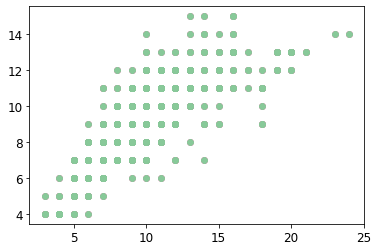

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred_new, color = 'hotpink')

plt.scatter(y_test, y_pred, color = '#88c999')

plt.show()

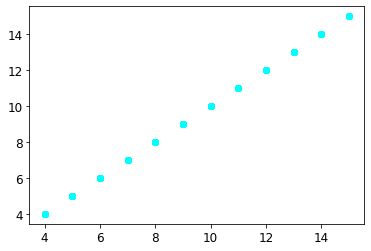

In [53]:
plt.scatter(y_pred, y_pred_new, color = 'cyan')

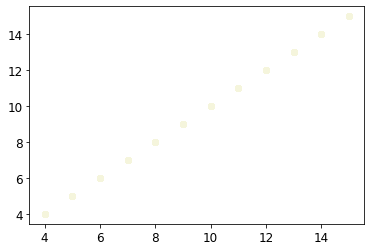

In [54]:
plt.scatter(y_pred_new, y_pred, color = 'beige')

### Bagging

In [55]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
bag_reg = BaggingRegressor(
    SVR(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=1212)
bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [56]:
y_pred

array([10.8801667 ,  9.80173839,  7.41524226,  6.82885206, 10.94571221,
        8.77477835, 10.29090633,  6.90311605, 10.321793  ,  7.14006801,
        8.59041205,  9.64473436,  8.35084514,  6.3482438 ,  8.85466669,
       10.56787391,  9.85742911, 10.34248592, 11.00031123, 10.49119867,
        7.22570292,  9.96442448,  7.49384986,  9.99566314,  9.4915996 ,
        9.05282609,  6.71729604,  6.49697611, 10.77836017, 10.13274978,
        9.19841096, 10.75788382,  9.44482238,  8.44375196, 10.46475522,
        9.59832686,  7.32542584,  8.8026782 ,  9.33978754,  9.85815263,
        8.8624692 , 10.42761679, 10.92140099, 10.04572936, 10.41236704,
       10.75802312,  9.50912698,  8.2236175 ,  9.77097387,  7.77847915,
        9.95721179, 11.06904419, 11.15289093,  7.53997955,  8.18313454,
        9.04198809,  9.55289338, 10.66899624, 11.26101024, 10.49463875,
        8.37713787,  9.3130703 ,  7.33655421, 10.21359211,  9.33005105,
       10.15280671, 10.73465804, 10.36024576,  7.10266851, 11.29

In [57]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2.723521838001764


In [58]:
from matplotlib.colors import ListedColormap

def plot_randomforest_boundary(reg, X, y, axes=[0, 100, 30, 50], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 20)
    x2s = np.linspace(axes[2], axes[3], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = reg.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [59]:

'''
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(rnd_reg_new, X_train.to_numpy(), y_train)
plt.title("Random Forest", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_reg, X_train.to_numpy(), y_train)
plt.title("Random Forest with Bagging", fontsize=14)
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()
'''
X_array = X.to_numpy()

In [60]:
X_array

array([[2.7300e+02, 8.2000e+01, 1.0500e+02, 2.1000e+02, 9.0000e+00,
        9.0400e+02, 6.8000e+02],
       [1.6300e+02, 1.4900e+02, 1.9100e+02, 1.8000e+02, 1.2000e+01,
        8.4300e+02, 7.4600e+02],
       [1.6200e+02, 1.4800e+02, 1.9100e+02, 1.7900e+02, 1.6000e+01,
        8.4000e+02, 7.4300e+02],
       [1.6200e+02, 1.4800e+02, 1.9000e+02, 1.7900e+02, 1.9000e+01,
        8.3800e+02, 7.4100e+02],
       [1.5400e+02, 1.1200e+02, 1.4400e+02, 2.2000e+02, 1.0000e+01,
        9.2300e+02, 6.5800e+02],
       [1.4700e+02, 8.9000e+01, 1.1500e+02, 2.0200e+02, 9.0000e+00,
        8.6000e+02, 8.2900e+02],
       [1.5200e+02, 1.3900e+02, 1.7800e+02, 1.6800e+02, 1.8000e+01,
        9.4400e+02, 6.9500e+02],
       [1.4500e+02, 0.0000e+00, 2.2700e+02, 2.4000e+02, 6.0000e+00,
        7.5000e+02, 8.5300e+02],
       [1.5200e+02, 0.0000e+00, 2.3700e+02, 2.0400e+02, 6.0000e+00,
        7.8500e+02, 8.9200e+02],
       [3.0400e+02, 0.0000e+00, 1.4000e+02, 2.1400e+02, 6.0000e+00,
        8.9500e+02, 7.2

In [61]:
y_test

869     12
48       9
2730     8
1541     7
1943    11
        ..
149     15
1787    10
3058    11
491     11
3326    16
Name: 15, Length: 627, dtype: int64

In [62]:
y

0      34.99
1      41.14
2      41.81
3      42.08
4      26.82
       ...  
98     49.97
99     50.23
100    50.50
101    49.17
102    48.77
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

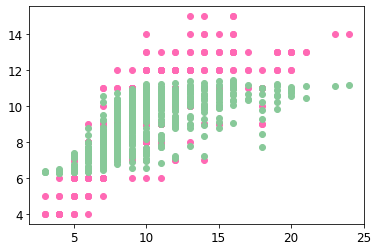

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred_new, color = 'hotpink')

plt.scatter(y_test, y_pred, color = '#88c999')

plt.show()

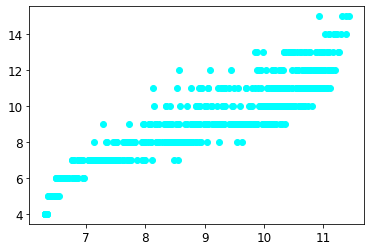

In [64]:
plt.scatter(y_pred, y_pred_new, color = 'cyan')

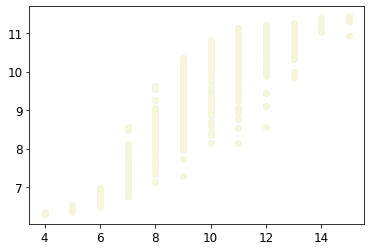

In [65]:
plt.scatter(y_pred_new, y_pred, color = 'beige')